# scikit-bio integration 

This recipe describes how to load trees from `skbio` objects. 

(this is a work in progress)

In [13]:
%%bash 
wget -O globin-aln.fasta https://raw.githubusercontent.com/biocore/scikit-bio-cookbook/679b1617db4e3e891155e0b989e44e63bdca0b2a/data/globin-aln.fasta 

--2016-01-21 17:25:19--  https://raw.githubusercontent.com/biocore/scikit-bio-cookbook/679b1617db4e3e891155e0b989e44e63bdca0b2a/data/globin-aln.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.31.18.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.31.18.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7974 (7.8K) [text/plain]
Saving to: ‘globin-aln.fasta’

     0K .......                                               100%  165M=0s

2016-01-21 17:25:22 (165 MB/s) - ‘globin-aln.fasta’ saved [7974/7974]



In [14]:
from skbio import nj, Alignment, Protein
aln = Alignment.read('globin-aln.fasta',  constructor=Protein)
dm = aln.distances()
tree = nj(dm)

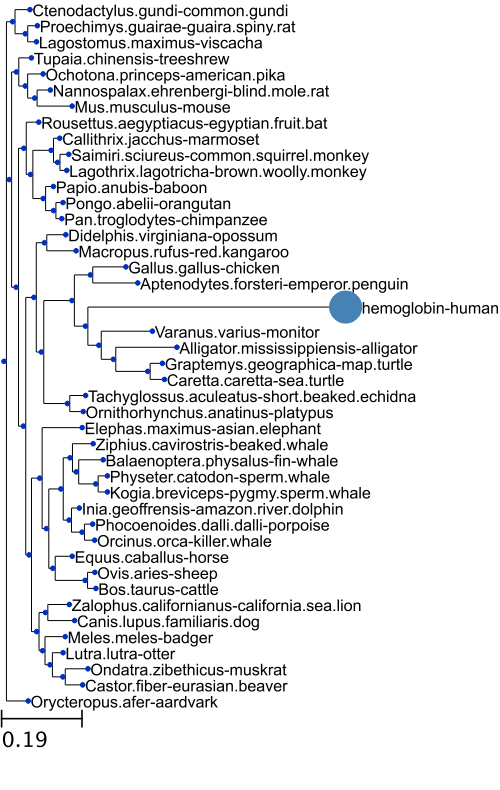

In [21]:
from ete3 import Tree, TreeStyle
t = Tree.from_skbio(tree)
t.dist = 0
node = (t & "hemoglobin-human")
node.img_style["size"] = 20
node.img_style["fgcolor"] = "steelBlue"
t.render("%%inline", w=500)

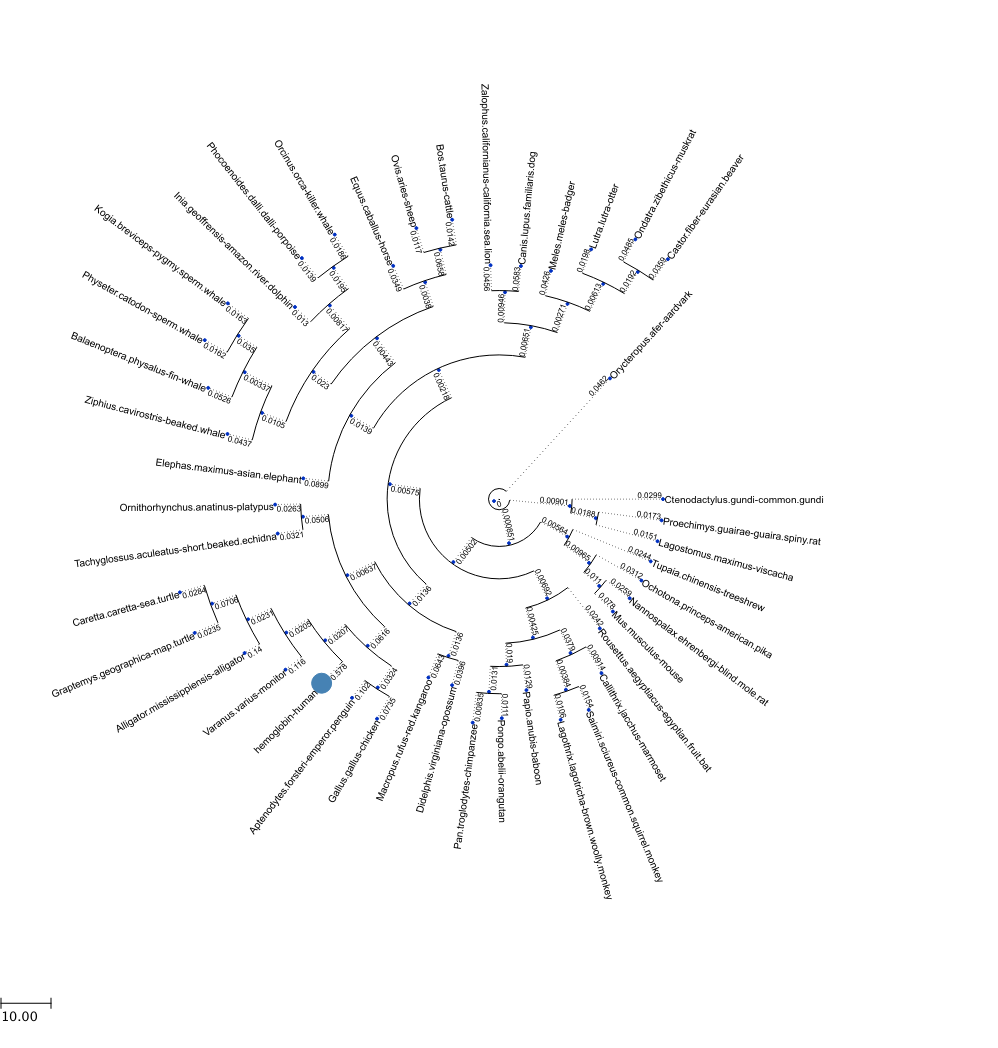

In [32]:
ts = TreeStyle()
ts.show_branch_length = True
ts.mode = "c"
ts.scale = 5
ts.arc_span = 320
t.render("%%inline", tree_style=ts)